# Newton-Raphson for $f$.

## I am going to use Newton-Raphson's method to solve Kepler's equation in order to find the true anomaly, $f$. This time, the true anomaly, $f$ will have a different value for each value of the time vector. 

## Kepler's equaiton is the following:
$$ M = E -esin(E) $$

## In order to solve it, it is useful to write it in the following form:
$$g(E) = E -esinE -M $$

## The true anomaly, $f$, can be obtained with the following equation:
$$ f = 2 arctan[\sqrt{\frac{1+e}{1-e}} tan(\frac{E}{2})]$$

In [5]:
#Import main libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The number of elements of the time vector is: 2000
The number of elements of the E0 vector is: 2000
The number of elements of the f vector is: 2000
0.3


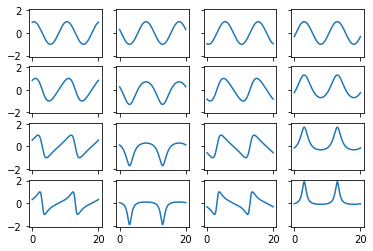

In [39]:
#Define a function for the Eccentric anomaly in Kepler's Equation. E is function of M
#which at the same time is function of t.
def g_E(t,params):
    g  = [None]*len(t)
    M  = params[0]
    e  = params[1]
    E  = params[2]
    t0 = params[3]
    T  = params[4]
    g  = E - e*np.sin(E) - M
    return g

#Now I define its derivative
def Dif_g(t,params):
    Dg = [None]*len(t)
    #M  = params[0]
    e  = params[1]
    E  = params[2]
    t0 = params[3]
    T  = params[4]
    Dg = 1 - e*np.cos(E)
    return Dg

#Now I define the time vector, give the value of t0 and other needed parameters
t  = np.arange(0,20,0.01)
t0 = 13#days
T  = 10 #days
M  = 2*np.pi*(t-t0)/T 
e  = 0
E0 = M
error = 10
i = 1

print('The number of elements of the time vector is:',len(t))

#Now I will create a function that solves Kepler's equation with Newton-Raphson:
def E_NR(E0,E1):
    while error > 1e-10 :
    #This line is the quid of Newton-Raphson's method
        E1 = E0 - g_E(t, [M,e,E0,t0,T])/Dif_g(t,[M,e,E0,t0,T])
    #This line computes the error between the old and new apporximated roots
        error = np.abs(E1-E0)
    #This line re-wrties the value of the old approximation in order to do the iterations
        E0 = E1
        i = i + 1
    #This line returns E0 as a vector with the same number of elements of the time vector 
    #(i.e.20/0.01 = 2000 elements)
        return E0

print('The number of elements of the E0 vector is:',len(E0))

#Now It is time to calculate the true anomaly since I already have M and E.
#I have to obtain a f vector with the same elements of the time vector
#So I have to iterate that number of times in order to obtain the f vector
for iteration in range(0,2000):
    #I write down the expression for f using np.arctan2
    f = 2*np.arctan2(np.sqrt((1+e)/(1-e))*np.tan(E0/2), 1)
    #At the end of this for, the vector f has the same number of elements of the time vector
    #(i.e. 2000 elemenst)
print('The number of elements of the f vector is:',len(f))
    
#Now I write a function that will compute the RV
def calcula_RV(t,parametros):
    vr = [None]*len(t)
    vz = parametros[0]
    K  = parametros[1]
    w  = parametros[2]
    vr = vz + K*(np.cos(w)*np.cos(f) - np.sin(w)*np.sin(f) + e*np.cos(w))
    #This line return vr as a vector with the same number of elements of the time vector
    #(i.e 20/0.01=2000 elements)
    return vr
#print('The number of elements of the vr vector is:',len(vr))

#Now I give some values for the RV plot
vz = 0 #km/s
K  = 1 #km/s
w  = np.pi/2  #radians

#### I THINK THAT THE FOLLOWING PART OF THE CODE CAN BE IMPROVED DRASTICALLY   ###
#### I DIDN'T USE THE FUNCTION gridspec AT ALL, SO I HAVE TO LEARN ABOUT THAT! ###

#Now I call the function that computes the radial velocity for the first plot
vr = calcula_RV(t, [vz,K,w])

#I WILL CREATE THE FUNCTIONS THAT WILL BE PLOTED IN THE FOLLOWIN ORDER#
#IT WILL BE A 4X4 ARRAY OF SUBPLOTS

#Now for the (1,2) plot I have to change omega
w=np.pi
vr_12 = calcula_RV(t,[vz,K,w])

#Now for the (1,3) plot I have to change omega
w = 3*np.pi/2
vr_13 = calcula_RV(t,[vz,K,w])

#Now for the (1,4) plot I have to change omega
w = 2*np.pi
vr_14 = calcula_RV(t,[vz,K,w])

#Now for the (2,1) plot. This time the eccentricity is changed.
#So I have to rewrite the for that computes f with the new eccentricity
w = np.pi/2
e = 0.3
for iteration in range(0,2000):
    f = 2*np.arctan2(np.sqrt((1+e)/(1-e))*np.tan(E0/2), 1)
    
vr_21 = calcula_RV(t,[vz,K,w])

#Now for the (2,2)plot
w = np.pi
vr_22 = calcula_RV(t,[vz,K,w])

#Now for the (2,3) plot
w = 3*np.pi/2
vr_23 = calcula_RV(t,[vz,K,w])

#Now for the (2,4) plot
w = 2*np.pi
vr_24 = calcula_RV(t,[vz,K,w])
print(e)

#Now for the (3,1) plot.This time the eccentricity changes.
#So I have to rewrite the for that computes f
e = 0.7
for iteration in range(0,2000):
    f = 2*np.arctan2(np.sqrt((1+e)/(1-e))*np.tan(E0/2), 1)
w = np.pi/2
vr_31 = calcula_RV(t,[vz,K,w])

#Now for the (3,2) plot
w = np.pi
vr_32 = calcula_RV(t,[vz,K,w])

#Now for the (3,3) plot
w = 3*np.pi/2
vr_33 = calcula_RV(t,[vz,K,w])

#Now for the (3,4) plot
w = 2*np.pi
vr_34 = calcula_RV(t,[vz,K,w])

#Now for the (4,1) plot.This time the eccentricity changes.
#So I have to rewrite the for that computes f
e = 0.9
for iteration in range(0,2000):
    M = 2*np.pi*(t-t0)/T
    f = 2*np.arctan2(np.sqrt((1+e)/(1-e))*np.tan(E0/2), 1)
w = np.pi/2
vr_41 = calcula_RV(t,[vz,K,w])

#Now for the (4,2) plot
w = np.pi
vr_42 = calcula_RV(t,[vz,K,w])

#Now for the (4,3) plot
w = 3*np.pi/2
vr_43 = calcula_RV(t,[vz,K,w])

#Now for the (4,4) plot
w = 2*np.pi
vr_44 = calcula_RV(t,[vz,K,w])

#Now I plot all of the above in the following array

#|e=0,  w = pi/2 | e=0,  w = pi | e=0,   w = 3pi/2 | e=0,   w = 2pi|
#|e=0.3,w = pi/2 | e=0.3,w = pi | e=0.3, w = 3pi/2 | e=0.3, w = 2pi|
#|e=0.7,w = pi/2 | e=0.7,w = pi | e=0.7, w = 3pi/2 | e=0.7, w = 2pi|
#|e=0.9,w = pi/2 | e=0.9,w = pi | e=0.9, w = 3pi/2 | e=0.9, w = 2pi|

fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
ax[0,0].plot(t,vr)    # row1, col 1
ax[1,0].plot(t,vr_21) # row2, col 1
ax[2,0].plot(t,vr_31) # row3, col 1
ax[3,0].plot(t,vr_41) # row4, col 1
ax[0,1].plot(t,vr_12) # row1, col 2
ax[1,1].plot(t,vr_22) # row2, col 2
ax[2,1].plot(t,vr_32) # row3, col 2
ax[3,1].plot(t,vr_42) # row4, col 2
ax[0,2].plot(t,vr_13) # row1, col 3
ax[1,2].plot(t,vr_23) # row2, col 3
ax[2,2].plot(t,vr_33) # row3, col 3
ax[3,2].plot(t,vr_43) # row4, col 3
ax[0,3].plot(t,vr_14) # row1, col 4
ax[1,3].plot(t,vr_24) # row2, col 4
ax[2,3].plot(t,vr_34) # row3, col 4
ax[3,3].plot(t,vr_44) # row4, col 4

## Incredibly, that worked really good! Now it is time to add the Transit part of the code. We need to address a lot of transit equations first in order to make decent plots about transits.

## Now let consider stars as  uniform sources of light. The limb darkening subsequent elliptical integrals of third kind can wait a little bit. If a star is considered  an uniform source of light, then we can consider the following equation:

$$ F(t) = 1 - \lambda (\delta, r_{p})$$

## Where $\delta$ is the so-called projected distance, which is defined as follows:

$$  \delta = \frac{a}{R_{*}} \frac{1 - e^{2}}{1 + e cosf} \sqrt{1 - sin^{2}(f + \omega) sin^{2}{i}} $$

## The projected distance is the distance between the star and the planet. If we define now the quantity $r_{p}$:

$$ r_{p} = \frac{R_{p}}{R_{*}} $$

## as the planet-to-star radius ratio, then the transit occurs when $ \delta < 1 + r_{p}$ and $sin(f + \omega) > 0$. On the other hand, an occultation occurs when $ \delta < 1 + r_{p}$ and $ sin(f + \omega) < 0$. Now, the Flux of the star with a single transiting planet is the following:

$$ F(t) = 1 - \lambda(\delta, r_{p})$$

## And since we are considering stars as uniform sources of light, the term $\lambda$ is:

$$ \lambda(\delta, r_{p}) = \frac{1}{\pi}[ r_{p}^{2}\kappa_{0} + \kappa_{1} - \sqrt{\frac{4\delta^{2}-(1 + \delta^{2} - r_{p}^{2})^{2}}{4}}] ;1 - r_{p} < \delta < 1 + r_{p}$$

## $\lambda(\delta, r_{p}) = r_{p}^{2}$ if $ \delta < 1 -r_{p}$. On the other hand, $\lambda(\delta, r_{p}) = 0$ if $\delta > 1 + r_{p}$. Also:

$$ \kappa_{0} = cos^{-1}[(r_{p}^{2} + \delta^{2} -1)/(2r_{p}\delta)] $$

$$ \kappa_{1} = cos^{-1}[(1-r_{p}^{2} + \delta^{2})/(2\delta)]$$

0.99
0.01


Text(0, 0.5, 'Flux [Arbirtray Units]')

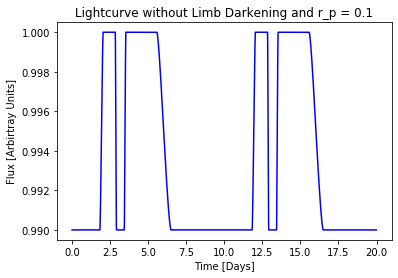

In [49]:
#In the first place, I will define the projected distance vector with the following function
def projected(t, par):
    delta  = [None]*len(t)
    a      = par[0]
    R_star = par[1]
    e      = par[2]
    w      = par[3]
    i      = par[4]
    delta  = (a*(1-e**2)*np.sqrt(1 - (np.sin(i)**2)*np.sin(f + w)**2))/(R_star*(1+e*np.cos(f)))
    return delta

#Now I have to define the lambda function. But in order to do that, I have to define first the coefficients
#k_o and k_1

def kappa_zero(delta, r_p):
    k_z = np.arccos((r_p**2 + delta**2 - 1)/(2*r_p*delta))
    return k_z

def kappa_one(delta, r_p):
    k_o = np.arccos((1 - r_p**2 + delta**2)/(2*delta))
    return k_o

#Now I can define the lambda function
def Calc_lambda(delta, r_p):
    l = [None]*len(delta)
    for i in range(0, len(delta)):
        if delta[i] > 1 + r_p:
            l[i] = 0
        elif delta[i] > 1 - r_p and delta[i] < 1 + r_p:
            k_loc_z = kappa_zero(delta[i], r_p)
            k_loc_o = kappa_one(delta[i], r_p)
            l[i] = (1/np.pi)*((r_p**2)*k_loc_z + k_loc_o - np.sqrt((4*delta[i]**2 - (1. + delta[i]**2 - r_p**2)**2)/4))
        else:
            l[i] = r_p**2
    return l

Lambda = np.array(l)


#Now I define the normalized flux
def Flux(Lambda):
    F = [None]*len(Lambda)
    F = 1. - Lambda
    return F


#NOW I GIVE SOME VALUES TO THE PARAMETERS FOR THE FIRST PLOT
#Semi-major axis
a = 1.45e8 #meters
#Stellar radius
R_star = 1e8 #meters
#Eccentricity
e = 0
#Stellar argument of periastron
w = 20 #radians
#Inclination
i = 30 #radians
#Ratio of radius
r_p = 0.1
#Now I call the functions
delta = projected(t, [a, R_star, e, w, i])
l = Calc_lambda(delta, r_p)
F = Flux(Lambda)


#NOW I GIVE ANOTHER VALUE OF r_p IN ORDER TO MAKE ANOTHER PLOT
r_p_1 = 0.05
l_1 = Calc_lambda(delta, r_p_1)
Lambda_1 = np.array(l_1)
F_1 = Flux(Lambda_1)

#NOW I GIVE ANOTHER VALUE OF r_p IN ORDER TO MAKE ANOTHER PLOT
r_p_2 = 0.01
l_2 = Calc_lambda(delta, r_p_2)
Lambda_2 = np.array(l_2)
F_2 = Flux(Lambda_2)

#NOW I PLOT
#plt.plot(delta, F_2, 'b', label = 'λ(δ, 0.01)')
#plt.plot(delta, F_1, 'g', label = 'λ(δ, 0.05)')
#plt.plot(delta, F, 'r', label = 'λ(δ, 0.1)')
#plt.xlim(0.6,1.6)
#plt.title('Synthetic Lightcurve.')
#plt.xlabel('δ')
#plt.ylabel('Normalized Flux [Arbitray Units]')
#plt.legend()
#Now I plot the light curve

print(F[1])
print(t[1])
plt.plot(t, F, 'b')
plt.title('Lightcurve without Limb Darkening and r_p = 0.1')
plt.xlabel('Time [Days]')
plt.ylabel('Flux [Arbirtray Units]')